<a href="https://colab.research.google.com/github/illuzionkek/BCU-Work/blob/main/Y1%20S2%20CMP-4294%20-%20Introduction%20to%20AI/Week_7_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
from google.colab import files
file = files.upload()

Saving insurance.csv to insurance (1).csv


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [35]:
data = pd.read_csv('insurance.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [36]:
#check for null values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [37]:
#check for any duplicated rows
data.duplicated().sum()

1

In [38]:
#check the original and the duplicated rows
data[data.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [39]:
#drop the duplicated row
data.drop_duplicates(inplace=True)

In [40]:
#check to confirm the duplicated row has been dropped
data.duplicated().sum()

0

In [41]:
data['sex'].value_counts()

#To convert text columns into number, let's display all the columns with texts object
display(data['sex'].value_counts())
display(data['smoker'].value_counts())
display(data['region'].value_counts())

male      675
female    662
Name: sex, dtype: int64

no     1063
yes     274
Name: smoker, dtype: int64

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

In [42]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [43]:
#creating one label encoder for sex and one label encoder for smoker
le_sex = LabelEncoder()
le_smoker = LabelEncoder()

#the fit object fits the specific values into the new columns using only the 2 values e.g. male, female into 0,1
le_sex.fit(data['sex'].drop_duplicates())
le_smoker.fit(data['smoker'].drop_duplicates())

#applying the encording and saving the results in new columns. Note that duplicates are not dropped here because we want to transform all the rows
data['sex_enc'] = le_sex.transform(data['sex'])
data['smoker_enc'] = le_smoker.transform(data['smoker'])

In [44]:
#now let's check the transformation
data.head()

,age,sex,bmi,children,smoker,region,charges,sex_enc,smoker_enc
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [45]:
#transforming the 'region' column using the OneHotEncorder and applying the 'passthrough'
#to the remaining columns so that the transformer leaves them as they are
ct = ColumnTransformer( [ ('ohe', OneHotEncoder(), ['region']) ], remainder='passthrough')
trans = ct.fit_transform(data)

In [46]:
#listing out the new dataframe headers
ins_data = pd.DataFrame(trans, columns=ct.get_feature_names_out())

#listing the new columns
list(ins_data.columns)

['ohe__region_northeast',
 'ohe__region_northwest',
 'ohe__region_southeast',
 'ohe__region_southwest',
 'remainder__age',
 'remainder__sex',
 'remainder__bmi',
 'remainder__children',
 'remainder__smoker',
 'remainder__charges',
 'remainder__sex_enc',
 'remainder__smoker_enc']

In [47]:
ins_data.head()

,ohe__region_northeast,ohe__region_northwest,ohe__region_southeast,ohe__region_southwest,remainder__age,remainder__sex,remainder__bmi,remainder__children,remainder__smoker,remainder__charges,remainder__sex_enc,remainder__smoker_enc
0,0.0,0.0,0.0,1.0,19,female,27.9,0,yes,16884.924,0,1
1,0.0,0.0,1.0,0.0,18,male,33.77,1,no,1725.5523,1,0
2,0.0,0.0,1.0,0.0,28,male,33.0,3,no,4449.462,1,0
3,0.0,1.0,0.0,0.0,33,male,22.705,0,no,21984.47061,1,0
4,0.0,1.0,0.0,0.0,32,male,28.88,0,no,3866.8552,1,0


In [48]:
#rename columns
ins_data.columns = ['region_northeast',
'region_northwest',
'region_southeast',
'region_southwest',
'age',
'sex',
'bmi',
'children',
'smoker',
'charges',
'sex_enc',
'smoker_enc']

In [49]:
#reorder columns
ins_data = ins_data[[ 'age',
'sex',
'sex_enc',
'bmi',
'children',
'smoker',
'smoker_enc',
'region_northeast',
'region_northwest',
'region_southeast',
'region_southwest',
'charges'
]]

In [50]:
#remove object columns, save into new dataset, and convert to numeric
ins_data_t = ins_data[[ 'age',
'sex_enc',
'bmi',
'children',
'smoker_enc',
'region_northeast',
'region_northwest',
'region_southeast',
'region_southwest',
'charges'
]]

ins_data_t = ins_data_t.apply(pd.to_numeric)
ins_data_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   int64  
 1   sex_enc           1337 non-null   int64  
 2   bmi               1337 non-null   float64
 3   children          1337 non-null   int64  
 4   smoker_enc        1337 non-null   int64  
 5   region_northeast  1337 non-null   float64
 6   region_northwest  1337 non-null   float64
 7   region_southeast  1337 non-null   float64
 8   region_southwest  1337 non-null   float64
 9   charges           1337 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 104.6 KB


In [51]:
df_corr = ins_data_t[['age',
'sex_enc',
'bmi',
'children',
'smoker_enc',
'charges'
]].corr()
df_corr

,age,sex_enc,bmi,children,smoker_enc,charges
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.298308
sex_enc,-0.019814,1.000000,0.046397,0.017848,0.076596,0.058044
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.198401
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.067389
smoker_enc,-0.025587,0.076596,0.003746,0.007331,1.000000,0.787234
charges,0.298308,0.058044,0.198401,0.067389,0.787234,1.000000


<Axes: >

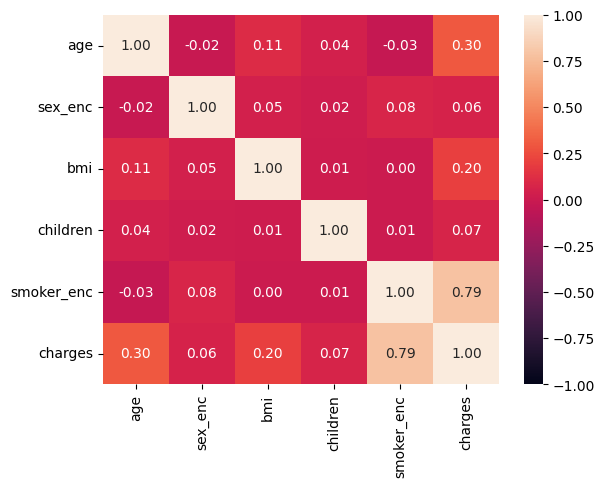

In [52]:
sns.heatmap(df_corr, vmin=-1, vmax=1, annot=True, fmt='.2f')

In [53]:
from sklearn.model_selection import train_test_split
df_feat = ins_data_t [['age',
'sex_enc',
'bmi',
'children',
'smoker_enc',
'charges'
]]

In [54]:
X = df_feat.iloc[:,0:-1]
y = df_feat.iloc[:,-1]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5,test_size=0.3)

In [56]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [57]:
# y = a + B*X
# a = model.intercept
# B = model.coef_
model.intercept_, model.coef_

(-12208.821145675387,
 array([ 2.58429753e+02, -2.03725400e+01,  3.23446962e+02,  5.54176940e+02,
         2.38187391e+04]))

In [58]:
y_pred = model.predict(X_test)

In [59]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mse = mean_squared_error(y_pred, y_test)
sqrt_mse = np.sqrt(mse)
mae = mean_absolute_error(y_pred, y_test)

In [60]:
print(f"MSE : {mse:.3f}, MSE_SQRT : {sqrt_mse:.3f}, MAE : {mae:.3f}")

MSE : 37138973.434, MSE_SQRT : 6094.175, MAE : 4214.806


In [61]:
r2 = model.score(X_test, y_test)
print(f"R2 score: {r2:.3f}")

R2 score: 0.746


In [62]:
df_feat['charges'].min(), df_feat['charges'].max(),
df_feat['charges'].max()- df_feat['charges'].min()

62648.554110000005

In [63]:
df_feat.columns

Index(['age', 'sex_enc', 'bmi', 'children', 'smoker_enc', 'charges'], dtype='object')

In [64]:
val = model.predict([[50,1, 45.9, 1, 0,]])
print('Predicted Insurance Charge =', val)

Predicted Insurance Charge = [16092.68646309]
